In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(".\Downloads\Sales_Data\Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### List all the CSV file in the directory

In [8]:
files = [file for file in os.listdir('./Downloads/Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


### Merge all the CSV file in the directory

In [9]:
files = [file for file in os.listdir('./Downloads/Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Downloads/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

### Creating a New csv file where we store the merge of all CSV

In [11]:
all_months_data.to_csv("all_data.csv", index = False)

### Read in an updated dataFrame

In [12]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning

### Drop rows of NAN

In [21]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


###  Adding a Month column and 'or' is a duplicate value in the column order_date

In [22]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

ValueError: invalid literal for int() with base 10: 'Or'

### Remove 'OR'


In [23]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

# Find the best month for sales. How much was earned that month?

### Task: Add a Month column

In [24]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task: Add a sales Column

### Convert the column datatype to numeric

In [26]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [27]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [31]:
Result= all_data.groupby('Month').sum()
Result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Plotting the Results

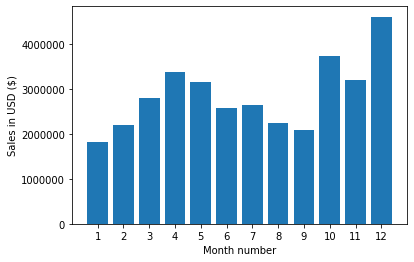

In [34]:
months = range(1,13)
plt.bar(months, Result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

# Which City had the highest number of  sales


### Task : Add a city column

In [38]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

# Another efficient way of doing this is

def get_city(address):
    return address.split(',')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


### Due to common city names. we also need to take the state names as well


In [49]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+' ('+ get_state(x)+')')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [52]:
result = all_data.groupby('City').sum()
result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


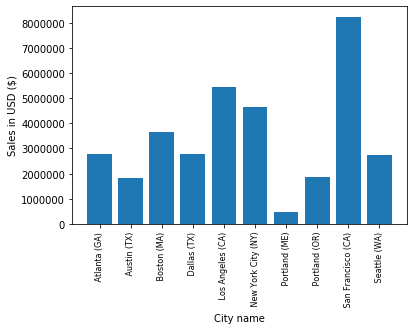

In [54]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, result['Sales'])
plt.xticks(cities, rotation = 'vertical', size= 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

# What time should we display advertisements to maximize likelihood of customer's buying product?

### Converting to datetime format

In [55]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [56]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Separate column for Hour and minutes

In [57]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


### Plotting the best time for advertisement

hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

 # Which product was sold together the most? 

In [66]:
df = all_data[all_data['Order ID'].duplicated(keep= False)] 
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49


### Making a new column Grouped for combined product details 

In [68]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

C:\Users\karan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


### Drop the duplicate rows from the Grouped column

In [70]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


### Count the pairs that occur frequently

In [74]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(10):
    print(key,value) 

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# What product sold the most?

Text(0.5, 0, 'Product name')

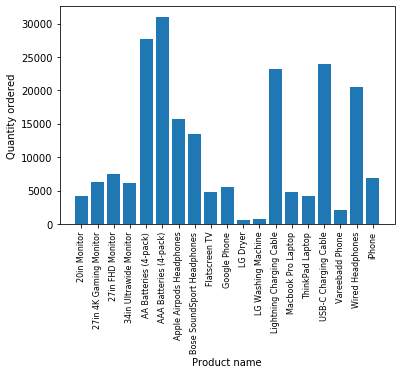

In [78]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products, rotation = 'vertical', size= 8)
plt.ylabel('Quantity ordered')
plt.xlabel('Product name')


### Price of each product

In [79]:

prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


### Adding second Y axis to an existing matplotlib()

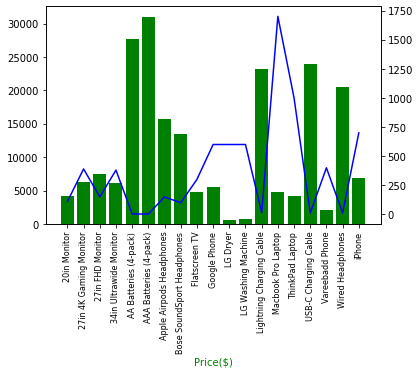

In [83]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products,prices,'b-')
ax1.set_xlabel('Product Name')
ax1.set_xlabel('Quantity Ordered', color = 'g')
ax1.set_xlabel('Price($)', color = 'g')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
plt.show()